# Notebook for testing showCamera.
Initially written 09 Mar 2020 by Craig Lage.\
Testing w_2020_13 code.

In [35]:
! eups list -s | grep lsst_distrib
! eups list -s | grep obs_lsst

lsst_distrib          19.0.0-1-gc154f85+75 	current w_2020_24 setup
obs_lsst              19.0.0-67-g60fb5fc 	current w_2020_24 setup
obs_lsst_data         19.0.0-3-g62ccb58 	current w_2020_24 setup


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.daf.persistence import Butler
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.display as afwDisplay

In [37]:
def myCallback(im, ccd, imageSource):
    """Assemble the CCD image.  Just bias subtraction and gain correction"""
    oim = camGeomUtils.rawCallback(im, ccd, imageSource,
                                       subtractBias=True, correctGain=True)
    return oim

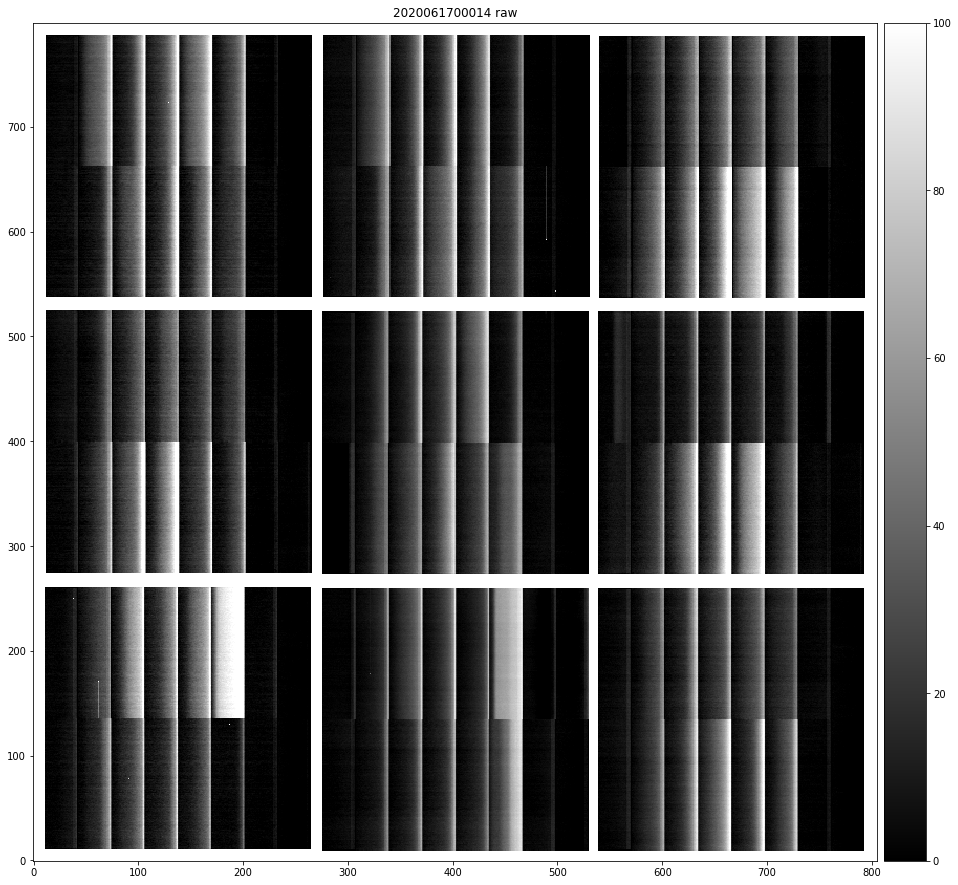

In [47]:
REPO_DIR = '/lsstdata/offline/teststand/comcam/Archiver/gen2repo'
#REPO_DIR = '/lsstdata/offline/teststand/comcam/CCS/gen2repo'
#REPO_DIR = '/lsstdata/offline/teststand/NCSA_comcam/gen2repo'

butler = Butler(REPO_DIR)
visit = 2020061700014



dataId = dict(expId=visit)
camera = butler.get('camera')

fig = plt.figure(figsize=(16,16))
disp = afwDisplay.Display(1, "matplotlib")
disp.scale('linear', 0, max=100)

dataType='raw'
mos = camGeomUtils.showCamera(camera, \
                              camGeomUtils.ButlerImage(butler, dataType, expId=dataId["expId"], \
                                                        verbose=False, callback = myCallback,\
#                                                        verbose=False, callback = camGeomUtils.rawCallback,\
                                                      background = np.nan),\
#                              binSize=16, detectorNameList=[0,1,2,3,4,5,6,7,8], display=disp, overlay=False, \
                              binSize=16, display=disp, overlay=False, \
                              title="%d %s" % (visit, dataType))
#fig.savefig(REPO_DIR+'plots/Pinhole_w_2020_13_04Apr20.png')

In [15]:
print(repr("Available run,day,visit,testType,imageType,exptime:"))
exposures=butler.queryMetadata('raw', ['run','dayObs','visit','testType','imageType','exptime','expId'],dayObs='2020-06-17',run='unknown')
for i in range(0,len(exposures)):
    print(exposures[i])


'Available run,day,visit,testType,imageType,exptime:'
('unknown', '2020-06-17', 4597680962803081520, 'DARK', 'DARK', 5.0, 2020061700012)
('unknown', '2020-06-17', 4597680962803081520, 'DARK', 'DARK', 5.0, 2020061700013)
('unknown', '2020-06-17', 972935147500374020, 'BIAS', 'BIAS', 0.0, 2020061700014)
